In [6]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

(4, 16588800)

In [7]:
# Import signal
ID = '07'
h = '31to39h'
data_mat = loadmat('../data/ID' + ID + '_' + h + '.mat')
info = loadmat('../data/ID' + ID + '_info.mat')
fs = float(info['fs'])
data_np = data_mat['EEG']
data_list = [data_np[i, :] for i in range(data_np.shape[0])]

In [3]:
# Parameters
show_corr = True
channel_idx = 0
sw_band = (0.5, 4)
nperseg = int(20*fs)
noverlap = int(10*fs)

t_stamps = [67, 256, 442]   # minutes
h_offset = 31  # hours

In [4]:
data = data_list[channel_idx]

# Get spectral density
f, t, Sxx = signal.spectrogram(data, fs, nperseg=nperseg, noverlap=noverlap, scaling='density')

# Extract slow wave band with tukey window
Sxx_band = Sxx[int(sw_band[0] * Sxx.shape[0] / f[-1]):int(sw_band[1] * Sxx.shape[0] / f[-1]), :]
tukey_window_band = np.tile(signal.tukey(Sxx_band.shape[0]), (Sxx_band.shape[1], 1)).T
Sxx_band_tukey = np.multiply(Sxx_band,  tukey_window_band)

# Compute average band power
swa = np.mean(Sxx_band_tukey, axis=0)

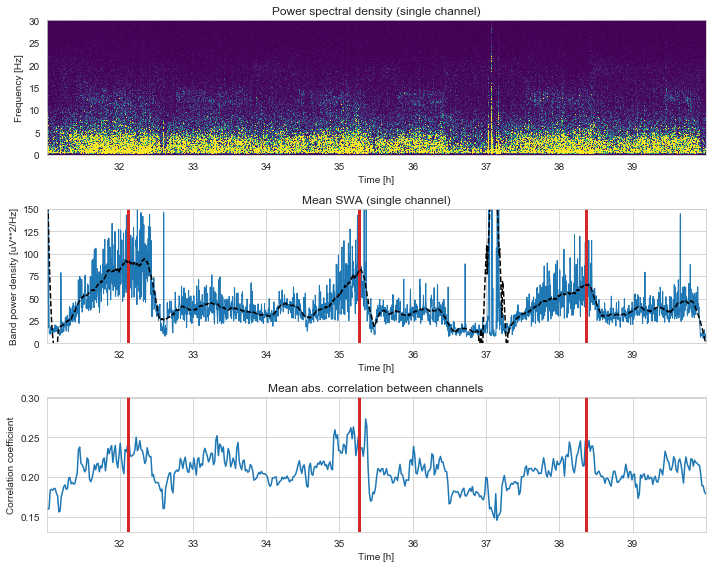

In [5]:
if show_corr:
    corrmean = np.load('../data/corrmean_ID' + ID + '_' + h + '_all.npy')
    figsize_1 = 8
    n_subplots = 3
else:
    figsize_1 = 5
    n_subplots = 2
    
fig = plt.figure(figsize=(10, figsize_1))
sns.set_style('whitegrid')
t_hours = t/60/60 + h_offset

ax0 = fig.add_subplot(n_subplots, 1, 1)
plt.pcolormesh(t_hours, f, Sxx, vmax=35, cmap='viridis')
ax0.set_ylim(0, 30)
ax0.set_xlim(t_hours[0], t_hours[-1])
ax0.set_title('Power spectral density (single channel)')
ax0.set_ylabel('Frequency [Hz]')
ax0.set_xlabel('Time [h]')

ax1 = fig.add_subplot(n_subplots, 1, 2)
plt.plot(t_hours, swa, lw=1)
upper_ylim = 150#np.max(swa)+np.max(swa)/10
for _, t_stamp in enumerate(t_stamps):
    plt.plot([t_stamp/60 + h_offset, t_stamp/60 + h_offset], [0, upper_ylim], c='tab:red', lw=3)
smooth = signal.savgol_filter(swa, window_length=101, polyorder=3)
plt.plot(t_hours, smooth, c='black', ls='--')
ax1.set_xlim(t_hours[0], t_hours[-1])
ax1.set_ylim(0, upper_ylim)
ax1.set_title('Mean SWA (single channel)')
ax1.set_ylabel('Band power density [uV**2/Hz]')
ax1.set_xlabel('Time [h]')

if show_corr:
    ax2 = fig.add_subplot(n_subplots, 1, 3)
    t_corr = np.linspace(t_hours[0], t_hours[-1], len(corrmean))
    upper_ylim = np.max(corrmean)+np.max(corrmean)/10
    lower_ylim = np.min(corrmean)-np.min(corrmean)/10
    plt.plot(t_corr, corrmean)
    for _, t_stamp in enumerate(t_stamps):
        plt.plot([t_stamp/60 + h_offset, t_stamp/60 + h_offset], [lower_ylim, upper_ylim], c='tab:red', lw=3)
    ax2.set_xlim(t_hours[0], t_hours[-1])
    ax2.set_ylim(lower_ylim, upper_ylim)
    ax2.set_title('Mean abs. correlation between channels')
    ax2.set_ylabel('Correlation coefficient')
    ax2.set_xlabel('Time [h]')

plt.tight_layout()
plt.savefig('timestamps_' + ID + '_' + h + '.png')
plt.show()


In [32]:
t_stamps = [67, 256, 442]
for i, val in enumerate(t_stamps):
    val_hour = h_offset+(val/60)
    val_min = (val_hour - np.floor(val_hour)) * 60
    print(str(i) + ' hour: ' + str(np.floor(val_hour)) + ' | min: ' + str(val_min))

0 hour: 32.0 | min: 7.000000000000028
1 hour: 35.0 | min: 15.999999999999943
2 hour: 38.0 | min: 22.00000000000003


In [14]:
corrmat = np.load('../data/corrmat_ID' + ID + '_' + h + '_all.npy')

0.070000000002
0.15
0.22000000000199998


In [26]:
0.1 * (0.1 ** (4 // 2))

0.0010000000000000002

In [18]:
1/6

0.16666666666666666